In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset= pd.read_csv(R"C:\Users\HP\Desktop\Data\Coffee Shop Sales.csv")

In [3]:
dataset.head(2)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [4]:
dataset.shape

(149116, 11)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


In [6]:
dataset["transaction_date"]= pd.to_datetime(dataset["transaction_date"])

In [7]:
dataset.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

## Performing data type corrections and deriving new features from existing columns.

In [8]:
dataset["transaction_date"] = pd.to_datetime(dataset["transaction_date"])

In [9]:
dataset["transaction_time"] = pd.to_datetime(dataset["transaction_time"])

C:\Users\HP\AppData\Local\Temp\ipykernel_8928\703010252.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset["transaction_time"] = pd.to_datetime(dataset["transaction_time"])


In [10]:
dataset["total_sales"] = (dataset["unit_price"] * dataset["transaction_qty"])

In [11]:
dataset["transaction_month"] = dataset["transaction_date"].dt.month

In [12]:
dataset["transaction_hour"] = dataset["transaction_time"].dt.hour

In [13]:
dataset["transaction_day"]= dataset["transaction_date"].dt.day

In [14]:
dataset["day_type"] = dataset["transaction_date"].dt.dayofweek.map(lambda x: "Weekend" if x >= 5 else "Weekday")

## analysis start from here

In [15]:
dataset["transaction_qty"].value_counts()

transaction_qty
1    87159
2    58642
3     3279
4       23
8       10
6        3
Name: count, dtype: int64

In [16]:
dataset["store_id"].value_counts()

store_id
8    50735
3    50599
5    47782
Name: count, dtype: int64

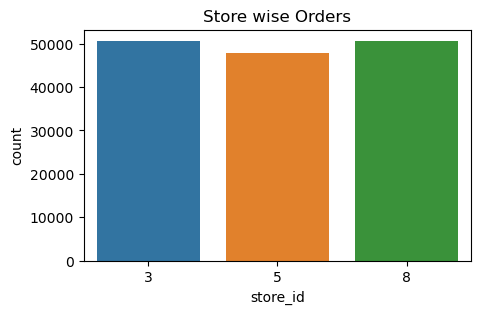

In [17]:
plt.figure(figsize=(5,3))
sns.countplot(x="store_id", data=dataset)
plt.title("Store wise Orders")
plt.savefig("jpg")
plt.show()

### Stores with ID 3 and 8 are performing well, with Store ID 5 also showing strong performance, albeit slightly lower than Stores 3 and 8.

In [18]:
sorted_order=dataset["product_category"].value_counts().index
print(sorted_order)

Index(['Coffee', 'Tea', 'Bakery', 'Drinking Chocolate', 'Flavours',
       'Coffee beans', 'Loose Tea', 'Branded', 'Packaged Chocolate'],
      dtype='object', name='product_category')


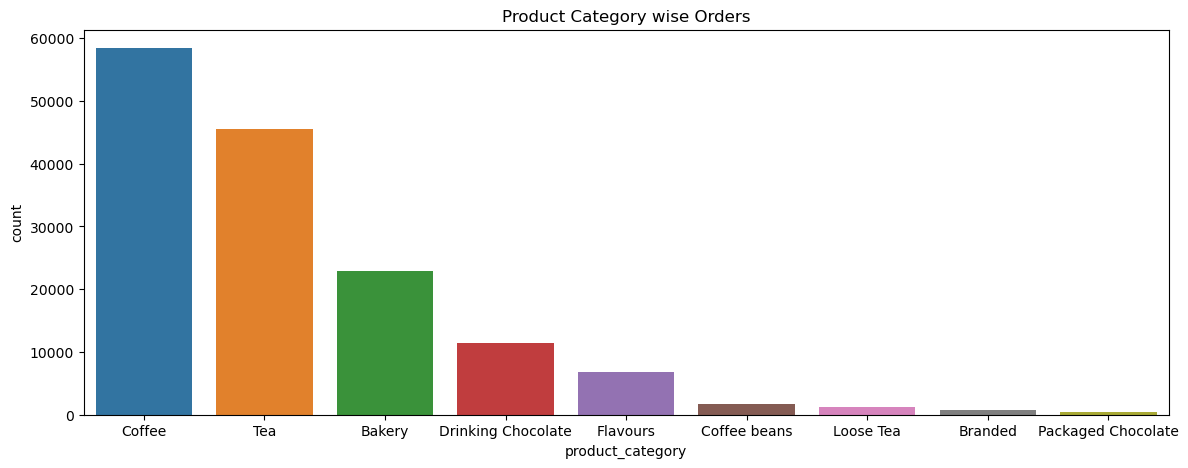

In [19]:
plt.figure(figsize=(14,5))
sns.countplot(x="product_category", data=dataset, order=sorted_order)
plt.title("Product Category wise Orders")
plt.show()

### The top five Ordering product categories are Coffee, Tea, Bakery, Drinking Chocolate, and Flavor Products.

In [20]:
Sales_by_product_category=dataset.groupby("product_category")["total_sales"].sum().reset_index()
Sales_by_product_category=Sales_by_product_category.sort_values(by="total_sales", ascending = False)
print(Sales_by_product_category)


     product_category  total_sales
2              Coffee    269952.45
8                 Tea    196405.95
0              Bakery     82315.64
4  Drinking Chocolate     72416.00
3        Coffee beans     40085.25
1             Branded     13607.00
6           Loose Tea     11213.60
5            Flavours      8408.80
7  Packaged Chocolate      4407.64


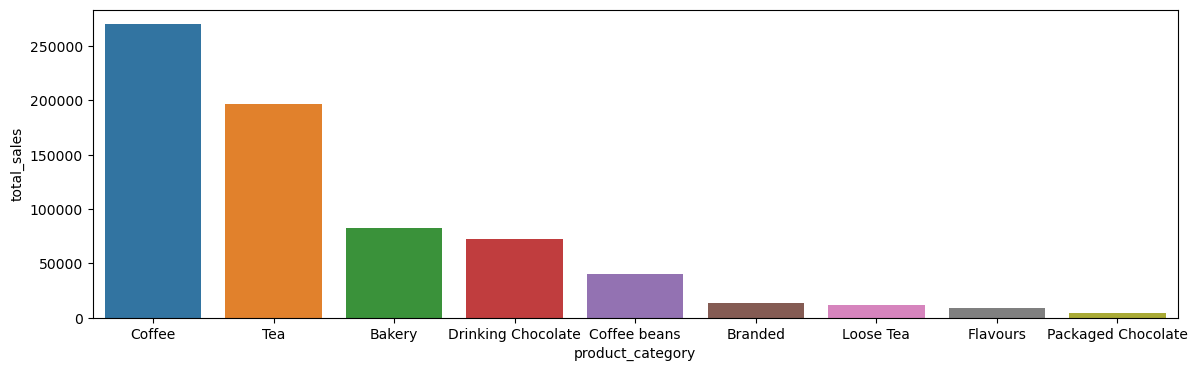

In [21]:
plt.figure(figsize=(14,4))
sns.barplot(x="product_category", y="total_sales", data=Sales_by_product_category)
plt.show()


### The top five Ordering product categories are Coffee, Tea, Bakery, Drinking Chocolate, and Coffee Beans Products.

In [22]:
sales_by_store = dataset.groupby(['store_id', "transaction_month"])['total_sales'].sum().reset_index()
sales_by_store=sales_by_store.sort_values(by="total_sales", ascending=False)
print(sales_by_store)

    store_id  transaction_month  total_sales
17         8                  6     56957.08
5          3                  6     55083.11
11         5                  6     54445.69
16         8                  5     52598.93
4          3                  5     52428.76
10         5                  5     51700.07
15         8                  4     40304.14
3          3                  4     39477.61
9          5                  4     39159.33
14         8                  3     33110.57
8          5                  3     32888.68
2          3                  3     32835.43
12         8                  1     27820.65
0          3                  1     27313.66
6          5                  1     26543.43
13         8                  2     25719.80
7          5                  2     25320.05
1          3                  2     25105.34


In [23]:
order_by_store = dataset.groupby(['store_id', "transaction_month"])['transaction_id'].count().reset_index()
order_by_store=order_by_store.sort_values(by="transaction_id", ascending=False)
print(order_by_store)

    store_id  transaction_month  transaction_id
17         8                  6           12071
5          3                  6           11985
4          3                  5           11475
11         5                  6           11296
16         8                  5           11294
10         5                  5           10758
15         8                  4            8629
3          3                  4            8556
9          5                  4            8150
14         8                  3            7267
2          3                  3            7180
8          5                  3            6782
0          3                  1            5913
12         8                  1            5868
13         8                  2            5606
6          5                  1            5533
1          3                  2            5490
7          5                  2            5263


<Figure size 800x400 with 0 Axes>

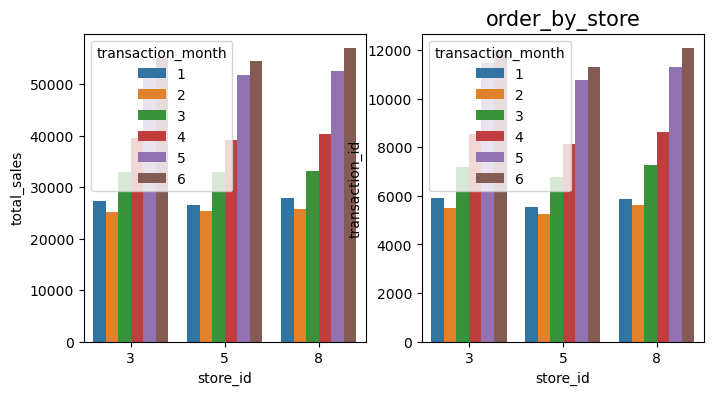

In [24]:
plt.figure(figsize=(8,4))
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.barplot(x='store_id', y='total_sales', data=sales_by_store, hue="transaction_month", ax=axes[0])
plt.xlabel("store_id", fontsize=10)
plt.ylabel("total_sales",fontsize=10)
plt.title("sales_by_store",fontsize=15)

sns.barplot(x='store_id', y='transaction_id', data=order_by_store, hue="transaction_month", ax=axes[1])
plt.xlabel("store_id", fontsize=10)
plt.ylabel("transaction_id",fontsize=10)
plt.title("order_by_store",fontsize=15)

plt.show()

### Monthly store sales and orders have been consistently increasing, except for February, which saw a decline compared to January. Special attention is needed for Store ID 5 to drive sales and order growth.

In [25]:
sales_by_month = dataset.groupby('transaction_month')['total_sales'].sum().reset_index()
print(sales_by_month)

   transaction_month  total_sales
0                  1     81677.74
1                  2     76145.19
2                  3     98834.68
3                  4    118941.08
4                  5    156727.76
5                  6    166485.88


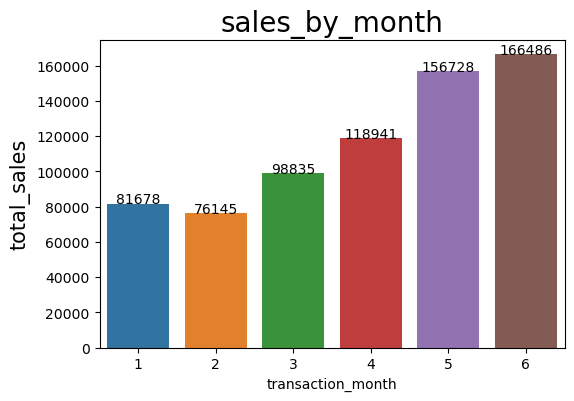

In [26]:
plt.figure(figsize=(6,4))
sns.barplot(x='transaction_month', y='total_sales', data=sales_by_month)
for index, row in sales_by_month.iterrows():
    plt.text(index, row['total_sales'] + 5, f'{row["total_sales"]:.0f}', ha='center', fontsize=10)
plt.xlabel("transaction_month", fontsize=10)
plt.ylabel("total_sales",fontsize=15)
plt.title("sales_by_month",fontsize=20)
plt.show()

### Saless are increasing every month, Only Feb month orders are decreased based on previous month order(Jan)

In [27]:
order_by_month = dataset.groupby('transaction_month')['transaction_id'].count().reset_index()
order_by_month=order_by_month.sort_values(by="transaction_id", ascending=False)
print(order_by_month)

   transaction_month  transaction_id
5                  6           35352
4                  5           33527
3                  4           25335
2                  3           21229
0                  1           17314
1                  2           16359


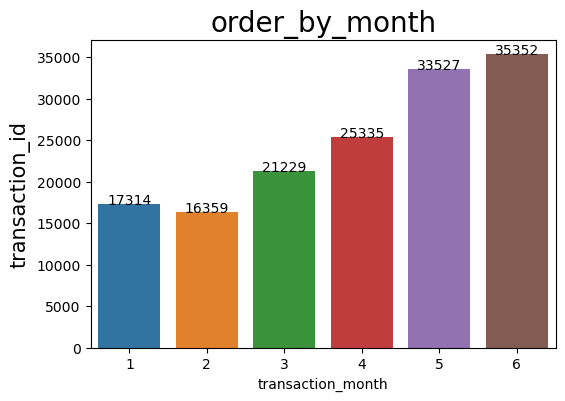

In [28]:
plt.figure(figsize=(6,4))
sns.barplot(x='transaction_month', y='transaction_id', data=order_by_month)
for index, row in order_by_month.iterrows():
    plt.text(index, row['transaction_id'] + 5, f'{row["transaction_id"]:.0f}', ha='center', fontsize=10)
plt.xlabel("transaction_month", fontsize=10)
plt.ylabel("transaction_id",fontsize=15)
plt.title("order_by_month",fontsize=20)
plt.show()

### Orders have been increasing each month, except for February, which experienced a decline compared to January.

In [29]:
sales_and_orders_by_day = dataset.groupby('day_type').agg(
    total_sales=('total_sales', 'sum'),
    total_orders=('transaction_id', 'count')
).reset_index()
print(sales_and_orders_by_day)

  day_type  total_sales  total_orders
0  Weekday    503587.54        107510
1  Weekend    195224.79         41606


In [30]:
print(sales_and_orders_by_day.columns)

Index(['day_type', 'total_sales', 'total_orders'], dtype='object')


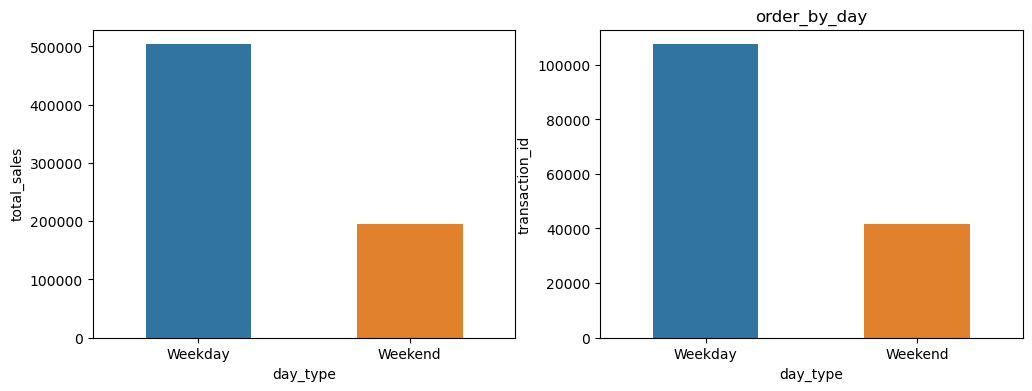

In [31]:
# Making plots to comparing sales and orders on weekends and weekdays 
fig, axes= plt.subplots(1,2, figsize=(12,4))
sns.barplot(x="day_type", y="total_sales", data=sales_and_orders_by_day, ax=axes[0],width=0.5)
plt.xlabel("day_type")
plt.ylabel("total_sales")
plt.title("sales_by_day")

sns.barplot(x="day_type", y="total_orders", data=sales_and_orders_by_day, ax=axes[1],width=0.5)
plt.xlabel("day_type")
plt.ylabel("transaction_id")
plt.title("order_by_day")
plt.show()

### The average sales and order values remain consistent across both weekends and weekdays.

In [32]:
dataset["transaction_hour"].value_counts()

transaction_hour
10    18545
9     17764
8     17654
7     13428
11     9766
16     9093
15     8979
14     8933
17     8745
13     8714
12     8708
18     7498
19     6092
6      4594
20      603
Name: count, dtype: int64

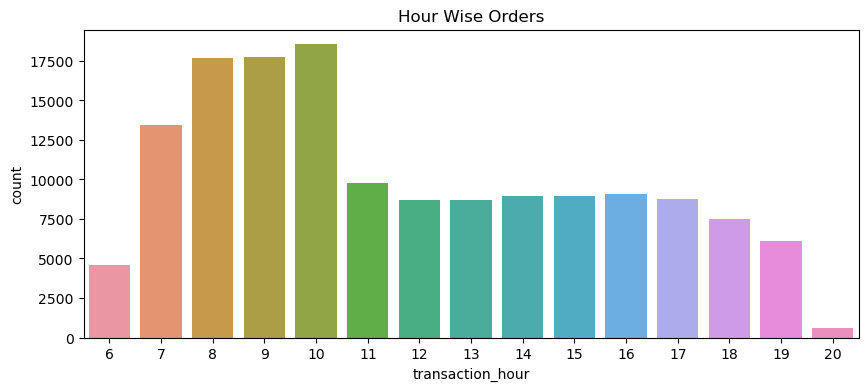

In [33]:
plt.figure(figsize=(10,4))
sns.countplot(x="transaction_hour", data=dataset)
plt.title("Hour Wise Orders")
plt.show()

### The peak order time falls between 7 AM and 10 AM, while the off-peak order times are at 6 AM and 8 PM.

In [34]:
hour_wise_sales=dataset.groupby("transaction_hour")["total_sales"].sum().reset_index()
hour_wise_sales= hour_wise_sales.sort_values(by="total_sales", ascending=False)
print(hour_wise_sales)

    transaction_hour  total_sales
4                 10     88673.39
3                  9     85169.53
2                  8     82699.87
1                  7     63526.47
5                 11     46319.14
9                 15     41733.10
8                 14     41304.74
10                16     41122.75
7                 13     40367.45
6                 12     40192.79
11                17     40134.31
12                18     34286.20
13                19     28446.68
0                  6     21900.27
14                20      2935.64


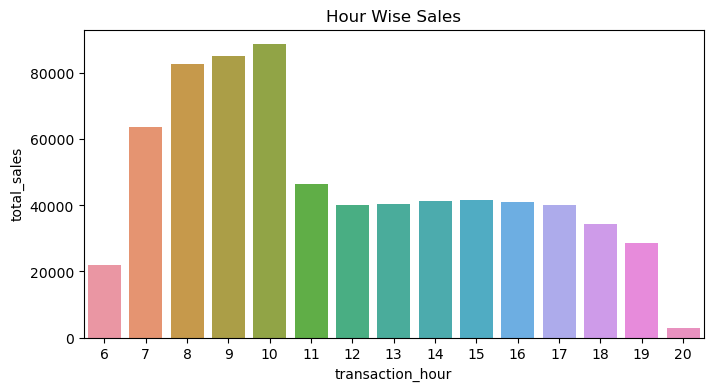

In [35]:
plt.figure(figsize=(8,4))
sns.barplot(x="transaction_hour", y="total_sales", data=hour_wise_sales)
plt.title("Hour Wise Sales")
plt.show()

In [36]:
day_wise_orders=dataset["total_sales"].value_counts().index

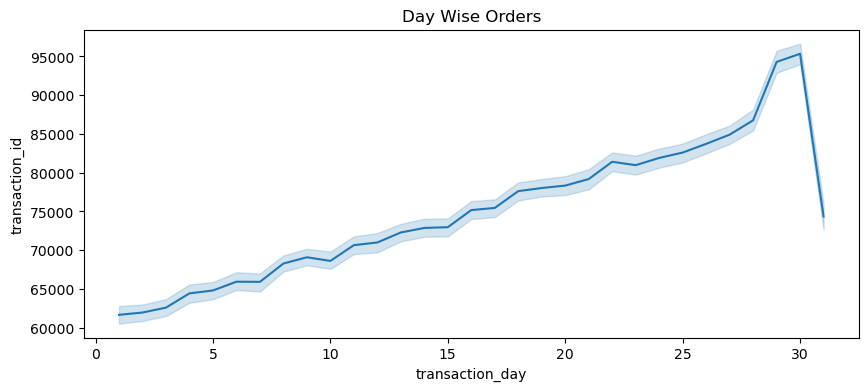

In [37]:
plt.figure(figsize=(10,4))
sns.lineplot(x="transaction_day", y="transaction_id", data=dataset)
plt.title("Day Wise Orders")
plt.show()

### orders has been increasing from start month to end date and the 31th of the month is getting less orders

In [38]:
day_wise_sales=dataset.groupby("transaction_day")["total_sales"].sum().reset_index()

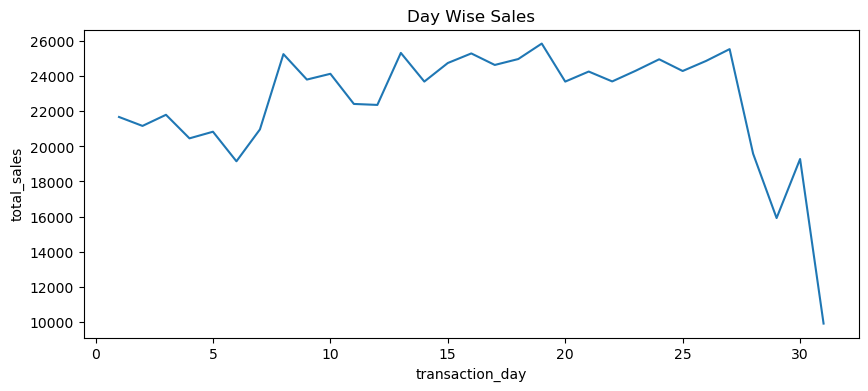

In [39]:
plt.figure(figsize=(10,4))
sns.lineplot(x="transaction_day", y="total_sales", data=day_wise_sales)
plt.title("Day Wise Sales")
plt.show()

### The peak selling days are between 8th - 27th day of the month and The worst selling day of the month is 31th day of the month